### 1. Importing required packages for the analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss
from itertools import product

### 2. Reading the data

In [2]:
data = pd.read_excel('COLUMBIA_measured_data.xlsx', sheet_name = 'Campaing exposure')
data_description = pd.read_excel('COLUMBIA_measured_data.xlsx', sheet_name = 'INFO')

In [3]:
data.head()

,pnr,timestamp,contentid,domain,devicetypeclass,country,region,city,panelid,slice_year,slice_month,slice_day,mediaid,cluster
0,0000b53b5a38961b,2021-08-26 11:07:58,341400101,https://googleads.g.doubleclick.net,SMARTPHONE,Colombia,Departamento de Bolivar,Cartagena,19640,2021,8,26,campaign_3414,JUMBO
1,0000b53b5a38961b,2021-08-26 11:07:58,341400101,https://googleads.g.doubleclick.net,SMARTPHONE,Colombia,Departamento de Bolivar,Cartagena,19640,2021,8,26,campaign_3414,JUMBO
2,00036269dd59a9d5,2021-08-28 01:06:20,341400101,https://f0996970ee7b5b5d710c1a2d400615f6.safef...,DESKTOP,Colombia,Atlántico,Barranquilla,nq_co,2021,8,28,campaign_3414,JUMBO
3,0003bf9f33aa0249,2021-08-25 15:37:01,341400101,https://googleads.g.doubleclick.net,SMARTPHONE,Colombia,Departamento de Caldas,Manizales,19640,2021,8,25,campaign_3414,JUMBO
4,0003bf9f33aa0249,2021-08-25 17:24:03,341400101,https://googleads.g.doubleclick.net,SMARTPHONE,Colombia,Departamento de Caldas,Manizales,19640,2021,8,25,campaign_3414,JUMBO


In [4]:
data.shape

(134408, 14)

In [5]:
data_description

,Variable,Description
0,pnr,panelist unique ID
1,timestamp,the moment when an event happened
2,contentid,unique ID of the ad content
3,domain,URL containing the ad message
4,devicetypeclass,device on which the ad was seen
5,country,country
6,region,region
7,city,city
8,panelid,the unique panel indetifier
9,slice_year,yaer partition of the event


### 3. Dropping duplicate records using the fulls set of columns to identify them

In [6]:
print("Number of rows in the data before dropping duplicate records is", data.shape[0])
print("Number of columns in the data is", data.shape[1])
data = data.drop_duplicates(subset= list(data.columns))
print("Number of rows after dropping duplicate records is", data.shape[0])

Number of rows in the data before dropping duplicate records is 134408
Number of columns in the data is 14
Number of rows after dropping duplicate records is 93126


### 4. Using pandas describe() method to get initial descriptive statistics

In [7]:
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
pnr,93122,22337,2970a8723ab7f608,83,NaN,NaN,NaN,NaN,NaN,NaN,NaN
timestamp,93126,89158,2021-08-30 18:27:23,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
contentid,93126,NaN,NaN,NaN,3.40903e+08,2.58068e+06,3.275e+08,3.414e+08,3.414e+08,3.414e+08,3.414e+08
domain,93126,26288,https://googleads.g.doubleclick.net,21300,NaN,NaN,NaN,NaN,NaN,NaN,NaN
devicetypeclass,93126,3,SMARTPHONE,62179,NaN,NaN,NaN,NaN,NaN,NaN,NaN
country,93126,3,Colombia,93046,NaN,NaN,NaN,NaN,NaN,NaN,NaN
region,91144,32,Bogota D.C.,31696,NaN,NaN,NaN,NaN,NaN,NaN,NaN
city,91128,447,Bogotá,31583,NaN,NaN,NaN,NaN,NaN,NaN,NaN
panelid,93126,4,nq_co,86348,NaN,NaN,NaN,NaN,NaN,NaN,NaN
slice_year,93126,NaN,NaN,NaN,2021,0,2021,2021,2021,2021,2021


### 5. Check and set proper data types

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 93126 entries, 0 to 134407
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   pnr              93122 non-null  object
 1   timestamp        93126 non-null  object
 2   contentid        93126 non-null  int64 
 3   domain           93126 non-null  object
 4   devicetypeclass  93126 non-null  object
 5   country          93126 non-null  object
 6   region           91144 non-null  object
 7   city             91128 non-null  object
 8   panelid          93126 non-null  object
 9   slice_year       93126 non-null  int64 
 10  slice_month      93126 non-null  int64 
 11  slice_day        93126 non-null  int64 
 12  mediaid          93126 non-null  object
 13  cluster          93126 non-null  object
dtypes: int64(4), object(10)
memory usage: 10.7+ MB


In [9]:
#Replace timestamp data type to Datetime 
data['timestamp'] = pd.to_datetime(data['timestamp'])
#Set contentid to be string
data.contentid = data.contentid.astype(str)
#Adding date column (YY/MM/dd)
data['date'] = pd.to_datetime(data.slice_year.astype(str)+ '-' + data.slice_month.astype(str)+ '-' + data.slice_day.astype(str) )

#### 5.1. Get number of numerical, categorical and date features

In [10]:
categorical_list = []
numerical_list = []
date_cols = []
for i in data.columns.tolist():
    if data[i].dtype=='object':
        categorical_list.append(i)
    elif data[i].dtype == 'int64' or data[i].dtype == 'float':
        numerical_list.append(i)
    else:
        date_cols.append(i)
print('Number of categorical features:', str(len(categorical_list)))
print('Number of numerical features:', str(len(numerical_list)))
print('Number of date features:', str(len(date_cols)))

Number of categorical features: 10
Number of numerical features: 3
Number of date features: 2


### 6. Check null values

In [11]:
data.isnull().sum()

pnr                   4
timestamp             0
contentid             0
domain                0
devicetypeclass       0
country               0
region             1982
city               1998
panelid               0
slice_year            0
slice_month           0
slice_day             0
mediaid               0
cluster               0
date                  0
dtype: int64

Since pnr is an improtant part of the idetification key we can drop the 4 records with missing ID.
We can replace the missings in region and city with 'other'. The missing values in those columns should not be an issue unless we are willing to use them for geospatial analysis or modeling. 

In [12]:
data = data.loc[data.pnr.notnull(), :]
data.region.fillna('Other', inplace = True)
data.city.fillna('Other', inplace = True)
data.isnull().sum()

pnr                0
timestamp          0
contentid          0
domain             0
devicetypeclass    0
country            0
region             0
city               0
panelid            0
slice_year         0
slice_month        0
slice_day          0
mediaid            0
cluster            0
date               0
dtype: int64

In [13]:
print('Number of rows after dropping null values is',data.shape[0])

Number of rows after dropping null values is 93122


### 7. Identidying a unique key in the data
Even after dropping duplicates we can see that there are multiple records per pnr, which means that one person can be exposed to the ad several times during the day. It would be most logical to use the complex key of 2 fields, namely: pnr and timestamp. Before selecting this as the key identifier, we can check if there are cases in the data where the user is exposed to more than one ad/message at the same exact time 

In [14]:
data.sort_values(by = 'pnr', ascending= 0).head()

,pnr,timestamp,contentid,domain,devicetypeclass,country,region,city,panelid,slice_year,slice_month,slice_day,mediaid,cluster,date
131077,fffc2677c1dd4116,2021-08-28 10:14:38,341400101,https://d-30433247941441241271.ampproject.net,SMARTPHONE,Colombia,Departamento de Bolivar,Cartagena,nq_co,2021,8,28,campaign_3414,JUMBO,2021-08-28
131075,fffc2677c1dd4116,2021-08-28 10:14:33,341400101,https://d-30433247941441241271.ampproject.net,SMARTPHONE,Colombia,Departamento de Bolivar,Cartagena,nq_co,2021,8,28,campaign_3414,JUMBO,2021-08-28
131074,fffbbf9c7597d074,2021-08-14 23:05:30,341400101,https://www.researchgate.net,DESKTOP,Colombia,Departamento del Valle del Cauca,Santiago de Cali,nq_co,2021,8,14,campaign_3414,JUMBO,2021-08-14
131073,fffbbf9c7597d074,2021-08-14 23:07:02,341400101,https://www.researchgate.net,DESKTOP,Colombia,Departamento del Valle del Cauca,Santiago de Cali,nq_co,2021,8,14,campaign_3414,JUMBO,2021-08-14
131072,fffbbf9c7597d074,2021-08-14 23:09:36,341400101,https://www.researchgate.net,DESKTOP,Colombia,Departamento del Valle del Cauca,Santiago de Cali,nq_co,2021,8,14,campaign_3414,JUMBO,2021-08-14


In [15]:
ad_per_time_usr = data.groupby(['pnr', 'timestamp']).size().reset_index(name = 'ad_count')

print('Maximum number of ad exposures per user at the same time is', ad_per_time_usr.ad_count.max())

Maximum number of ad exposures per user at the same time is 3


Apparantely pnr and timestamp on their own do not shape a unique row in the data. We can go through the cases with more than 1 exposure to identify the reasons.

In [16]:
df = ad_per_time_usr[(ad_per_time_usr.ad_count == 3) | (ad_per_time_usr.ad_count == 2)].sort_values(by = 'pnr')
df = df.merge(data, how = 'left', on = ['pnr', 'timestamp'])
print('Number of rows in subset is', df.shape[0])
df.head()

Number of rows in subset is 748


,pnr,timestamp,ad_count,contentid,domain,devicetypeclass,country,region,city,panelid,slice_year,slice_month,slice_day,mediaid,cluster,date
0,00c9d40a9f3bd8c0,2021-08-27 02:54:21,2,341400101,https://414ee805025692f776773fa5f9afd8c0.safef...,SMARTPHONE,Colombia,Atlántico,Barranquilla,nq_co,2021,8,27,campaign_3414,JUMBO,2021-08-27
1,00c9d40a9f3bd8c0,2021-08-27 02:54:21,2,341400101,https://www.wradio.com.co,SMARTPHONE,Colombia,Atlántico,Barranquilla,nq_co,2021,8,27,campaign_3414,JUMBO,2021-08-27
2,039cf626b18f9df5,2021-08-12 16:17:55,2,341400101,https://b4d52322c4f7910396c152ae6170384a.safef...,DESKTOP,Colombia,Antioquia,Medellín,nq_co,2021,8,12,campaign_3414,JUMBO,2021-08-12
3,039cf626b18f9df5,2021-08-12 16:17:55,2,341400101,https://471d020d2341cdfd137f9f785785045f.safef...,DESKTOP,Colombia,Antioquia,Medellín,nq_co,2021,8,12,campaign_3414,JUMBO,2021-08-12
4,03dc578b6c3a6b88,2021-08-12 21:34:29,2,341400101,https://e268486cf414911d28cafa26504f9e0a.safef...,SMARTPHONE,Colombia,Bogota D.C.,Bogotá,nq_co,2021,8,12,campaign_3414,JUMBO,2021-08-12


We can see that one of the differences in the domain. Some users, like 00c9d40a9f3bd8c0 for example, are exposed to the same message, same campaign, device and location, but with a different domain. Let's see how many cases are those.

In [17]:
domain_above_2 = df.groupby(['pnr', 'timestamp'])['domain'].nunique().reset_index(name = 'domain_counts')
domain_above_2[domain_above_2.domain_counts > 1].shape[0]

300

In [18]:
# We will add the domain to the list of fields to group by
ad_per_time_usr = data.groupby(['pnr', 'timestamp', 'domain']).size().reset_index(name = 'ad_count')
print('Maximum number of ad exposures per user at the same time is', ad_per_time_usr.ad_count.max())

Maximum number of ad exposures per user at the same time is 2


We have reduced the count to 2, however, this means that there are other features that define a unique row.

In [19]:
df = ad_per_time_usr[(ad_per_time_usr.ad_count == 3) | (ad_per_time_usr.ad_count == 2)].sort_values(by = 'pnr')
df = df.merge(data, how = 'left', on = ['pnr', 'timestamp', 'domain'])
print('Number of rows in subset is', df.shape[0])

df.head()

Number of rows in subset is 150


,pnr,timestamp,domain,ad_count,contentid,devicetypeclass,country,region,city,panelid,slice_year,slice_month,slice_day,mediaid,cluster,date
0,065235088df22dfa,2021-08-31 19:48:46,https://googleads.g.doubleclick.net,2,341400101,SMARTPHONE,Colombia,Antioquia,Medellín,nq_co,2021,8,31,campaign_3414,JUMBO,2021-08-31
1,065235088df22dfa,2021-08-31 19:48:46,https://googleads.g.doubleclick.net,2,341400101,SMARTPHONE,Colombia,Antioquia,Bello,nq_co,2021,8,31,campaign_3414,JUMBO,2021-08-31
2,073495f826f0d208,2021-04-27 01:26:21,https://imasdk.googleapis.com,2,327500102,SMARTPHONE,Colombia,Departamento de Boyaca,Duitama,nq_co,2021,4,27,campaign_3288,Bancolombia,2021-04-27
3,073495f826f0d208,2021-04-27 01:26:21,https://imasdk.googleapis.com,2,327500102,SMARTPHONE,Colombia,Departamento de Boyaca,Duitama,nq_co,2021,4,27,campaign_6346,Bancolombia,2021-04-27
4,0a2a6dba89f9d4d1,2021-08-19 23:37:53,https://googleads.g.doubleclick.net,2,341400101,SMARTPHONE,Colombia,Departamento del Magdalena,Palmira,19640,2021,8,19,campaign_3414,JUMBO,2021-08-19


In [20]:
# There are cases where the same event is happening in two cities at the same time according to data.
city_above_1 = df.groupby(['pnr', 'timestamp', 'domain'])['city'].nunique().reset_index(name = 'city_counts')
city_above_1[city_above_1.city_counts > 1].shape[0]

46

We can see that those are only 46 cases. We can fully drop those from the dataset. If we aim to keep only one of the records a.k.a drop duplicates by subset and keep first records, we might accidentally introduce inaccurate information in the data.

In [21]:
pnr_to_exclude = list(city_above_1[city_above_1.city_counts > 1].pnr.unique())
# removing the cases from the intial dataset
data = data[~data.pnr.isin(pnr_to_exclude)]

# Checking ad exposure count after adjustment 
ad_per_time_usr = data.groupby(['pnr', 'timestamp', 'domain']).size().reset_index(name = 'ad_count')

print('Maximum number of ad exposures per user at the same time is', ad_per_time_usr.ad_count.max())

Maximum number of ad exposures per user at the same time is 2


In [22]:
# third iteration to check reason for multiple exposures at the same time
df = ad_per_time_usr[(ad_per_time_usr.ad_count == 3) | (ad_per_time_usr.ad_count == 2)].sort_values(by = 'pnr')
df = df.merge(data, how = 'left', on = ['pnr', 'timestamp', 'domain'])
print('Number of rows in subset is', df.shape[0])

df.head()

Number of rows in subset is 58


,pnr,timestamp,domain,ad_count,contentid,devicetypeclass,country,region,city,panelid,slice_year,slice_month,slice_day,mediaid,cluster,date
0,073495f826f0d208,2021-04-27 01:26:21,https://imasdk.googleapis.com,2,327500102,SMARTPHONE,Colombia,Departamento de Boyaca,Duitama,nq_co,2021,4,27,campaign_3288,Bancolombia,2021-04-27
1,073495f826f0d208,2021-04-27 01:26:21,https://imasdk.googleapis.com,2,327500102,SMARTPHONE,Colombia,Departamento de Boyaca,Duitama,nq_co,2021,4,27,campaign_6346,Bancolombia,2021-04-27
2,13dd8805a9339915,2021-04-28 04:56:30,https://imasdk.googleapis.com,2,327500102,SMARTPHONE,Colombia,Bogota D.C.,Bogotá,nq_co,2021,4,28,campaign_6241,Bancolombia,2021-04-28
3,13dd8805a9339915,2021-04-28 04:56:30,https://imasdk.googleapis.com,2,327500102,SMARTPHONE,Colombia,Bogota D.C.,Bogotá,nq_co,2021,4,28,campaign_6303,Bancolombia,2021-04-28
4,203f3ba10076bad6,2021-05-18 13:15:28,https://d-38346101041713686610.ampproject.net,2,327500101,SMARTPHONE,Colombia,Bogota D.C.,Bogotá,nq_co,2021,5,18,campaign_3408,Bancolombia,2021-05-18


According to the data a user can be exposed to 2 different campaigns with the same message (contentid) at the same time. 

In [23]:
# We will add the domain to the list of fields to groupby
ad_per_time_usr = data.groupby(['pnr', 'timestamp', 'domain', 'mediaid']).size().reset_index(name = 'ad_count')
print('Maximum number of ad exposures per user at the same time is', ad_per_time_usr.ad_count.max())

Maximum number of ad exposures per user at the same time is 1


#### We have managed to determine the compound unique key identifier, which is shaped from the following fields: pnr, timestamp, domain, mediaid

### 8. Checking patterns in the data

Since this data is about users in Colombia (about 99% of the data) we will drop records about users from Argentina and the USA since they are relatively low. They might have occurred in the data by mistake since the supermarket does not have any sites in the USA and the financial services company does not offer services in Argentina or USA. 

In [24]:
data = data[data.country == 'Colombia']

##### 8.1. Which is the dominant cluster in the data? 

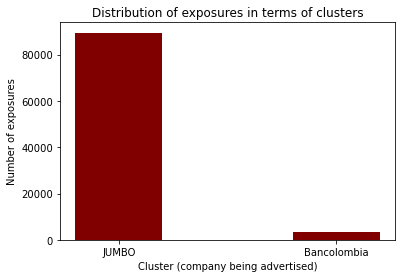

In [25]:
plt.bar(list(data.cluster.unique()), height = list(data.cluster.value_counts()),color ='maroon', 
        width = 0.4)
 
plt.xlabel("Cluster (company being advertised)")
plt.ylabel("Number of exposures")
plt.title("Distribution of exposures in terms of clusters")
plt.show()

From the bar plot above we can see the the dominant cluster is about the supermarket JUMBO, meaning that users in the dataset are manily exposed to ads about this company.

##### 8.2. On which device are the users exposed to ads the most?

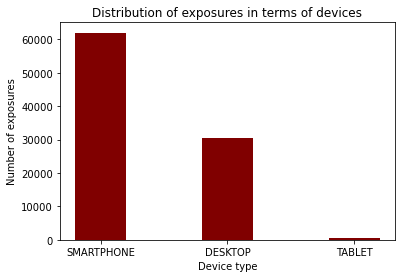

In [26]:
plt.bar(list(data.devicetypeclass.unique()), height = list(data.devicetypeclass.value_counts()),color ='maroon', 
        width = 0.4)
 
plt.xlabel("Device type")
plt.ylabel("Number of exposures")
plt.title("Distribution of exposures in terms of devices")
plt.show()

##### 8.3. What is the number of campaigns for each of the businesses/ clusters

In [27]:
data.groupby('cluster')['mediaid'].nunique().reset_index(name='business')

,cluster,business
0,Bancolombia,3319
1,JUMBO,1


We can see there is only one campaign for the supermarket Jumbo, however, as seen in the bar chart above, most data seems to be about this campaign as the cluster is dominant.

##### 8.4. Number of ad exporsures per day for each pnr 

In [28]:
data['ad'] = data['mediaid']+ '_'+ data['contentid'].astype(str) # column that identifies unique ad
unique_ads_per_day = data.groupby(['pnr', 'date'])['ad'].nunique().reset_index(name = 'ads')

In [29]:
unique_ads_per_day.head()

,pnr,date,ads
0,0000b53b5a38961b,2021-08-26,1
1,00036269dd59a9d5,2021-08-28,1
2,0003bf9f33aa0249,2021-08-25,1
3,00056a5a4a2df7dc,2021-08-11,1
4,00056a5a4a2df7dc,2021-08-18,1


Using a box plot we can check how the values are spread in the data.

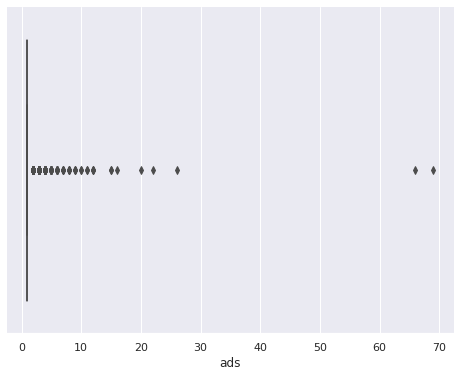

In [30]:
sns.set(rc={'figure.figsize':(8,6)})
sns.set_style("darkgrid")
sns.boxplot(x =unique_ads_per_day['ads'])
sns.despine(left=True)

We can tell that there are some extreme cases in the data. We can gain a better understanding again using the describe method.

In [31]:
unique_ads_per_day.describe()

,ads
count,39010.000000
mean,1.024019
std,0.583478
min,1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,69.000000


The maximum value is 69 and the values at the 3 percentiles (25%, 50% and 75%) is 1. 

In [32]:
Q1 = unique_ads_per_day.ads.quantile(0.25)
Q3 = unique_ads_per_day.ads.quantile(0.75)
IQR = Q3-Q1
print(IQR)

0.0


We can see that the IQR (Interquartile range) is 0, which means that there is no variability in the middle 50% of the data. We can check the number of these cases by filtering rows with ads > 10.

In [33]:
pnrs_to_review = list(unique_ads_per_day[unique_ads_per_day.ads > 10].pnr.unique())
print('Number of ids with ad exposures > 10 is', len(pnrs_to_review))

Number of ids with ad exposures > 10 is 11


We will review one of the cases.

In [34]:
df = data[data.pnr == pnrs_to_review[2]]

In [35]:
df.head(10)

,pnr,timestamp,contentid,domain,devicetypeclass,country,region,city,panelid,slice_year,slice_month,slice_day,mediaid,cluster,date,ad
131942,24fac216da5cc50d,2021-05-25 15:18:07,327500102,UNKNOWN,DESKTOP,Colombia,Atlántico,Barranquilla,nq_co,2021,5,25,campaign_4138,Bancolombia,2021-05-25,campaign_4138_327500102
131944,24fac216da5cc50d,2021-05-25 15:21:42,327500102,UNKNOWN,DESKTOP,Colombia,Atlántico,Barranquilla,nq_co,2021,5,25,campaign_4140,Bancolombia,2021-05-25,campaign_4140_327500102
131946,24fac216da5cc50d,2021-05-25 16:44:49,327500102,UNKNOWN,DESKTOP,Colombia,Atlántico,Barranquilla,nq_co,2021,5,25,campaign_4142,Bancolombia,2021-05-25,campaign_4142_327500102
131947,24fac216da5cc50d,2021-05-25 16:48:44,327500102,UNKNOWN,DESKTOP,Colombia,Atlántico,Barranquilla,nq_co,2021,5,25,campaign_4143,Bancolombia,2021-05-25,campaign_4143_327500102
131948,24fac216da5cc50d,2021-05-25 16:13:48,327500102,UNKNOWN,DESKTOP,Colombia,Atlántico,Barranquilla,nq_co,2021,5,25,campaign_4144,Bancolombia,2021-05-25,campaign_4144_327500102
131949,24fac216da5cc50d,2021-05-25 15:20:32,327500102,UNKNOWN,DESKTOP,Colombia,Atlántico,Barranquilla,nq_co,2021,5,25,campaign_4145,Bancolombia,2021-05-25,campaign_4145_327500102
131953,24fac216da5cc50d,2021-05-25 16:10:57,327500102,UNKNOWN,DESKTOP,Colombia,Atlántico,Barranquilla,nq_co,2021,5,25,campaign_4149,Bancolombia,2021-05-25,campaign_4149_327500102
131955,24fac216da5cc50d,2021-05-25 16:52:47,327500102,UNKNOWN,DESKTOP,Colombia,Atlántico,Barranquilla,nq_co,2021,5,25,campaign_4151,Bancolombia,2021-05-25,campaign_4151_327500102
131957,24fac216da5cc50d,2021-05-25 16:12:50,327500102,UNKNOWN,DESKTOP,Colombia,Atlántico,Barranquilla,nq_co,2021,5,25,campaign_4153,Bancolombia,2021-05-25,campaign_4153_327500102
131967,24fac216da5cc50d,2021-05-25 15:19:01,327500102,UNKNOWN,DESKTOP,Colombia,Atlántico,Barranquilla,nq_co,2021,5,25,campaign_4163,Bancolombia,2021-05-25,campaign_4163_327500102


In [36]:
print('Number of unique clusters', len(df.cluster.unique()))
print('Number of unique messages', len(df.contentid.unique()))
print('Number of unique campaigns', len(df.mediaid.unique()))

Number of unique clusters 1
Number of unique messages 1
Number of unique campaigns 69


We can tell that the high number of exposures in the data is due to the different campaigns with which the same message is advertised. These cases can be handled depending on the purpose of the analysis. Removing them might lead to loss of information.

### 9. Finding correlation between variables

We will be looking at correlation between categorical variables: correlation between the ad message, device type, city and cluster. Our null hypothesis is that there is nor relation between the variables.

In [37]:
def Chi_2_corr(col_list, data):
    
    """
    A function that calculates the chi square stats and retruns a dataframe
    with the cols: var1, var2, chi2 and p-value, where var1 and var2 are the examined 
    variables.
    Takes in a list of variables to be examined and a dataset 

    """
    #prep 2 list with same columns to calculate combinations
    cat_vars_x = col_list.copy()
    cat_vars_y = col_list.copy()
    
    #get all possible combinations
    cat_var_prod = list(product(cat_vars_x,cat_vars_y, repeat = 1))
    
    #calculate chi2 for each combination, save chi2 statistic and p-value
    result = []
    
    for i in cat_var_prod:
        if i[0] != i[1]: #skipping correlation of variable with itself
            contingency_table = pd.crosstab(data[i[0]], data[i[1]]) #creating a frequency count table between the two variables.
            stats = list(ss.chi2_contingency(contingency_table))
            result.append((i[0],i[1],round(stats[0],3), stats[1]))
    
    correlation_output = pd.DataFrame(result, columns = ['var1', 'var2', 'chi2', 'p-value'])
    for_plot = correlation_output.pivot(index= 'var1', columns= 'var2', values= 'p-value')
    return correlation_output, for_plot

In [38]:
cat_var1 =['city', 'devicetypeclass', 'contentid', 'cluster']
correlation_output, for_plot = Chi_2_corr(cat_var1, data)

In [39]:
correlation_output

,var1,var2,chi2,p-value
0,city,devicetypeclass,3556.547,0.000000e+00
1,city,contentid,3887.808,0.000000e+00
2,city,cluster,2236.376,3.099602e-236
3,devicetypeclass,city,3556.547,0.000000e+00
4,devicetypeclass,contentid,584.372,3.735378e-125
5,devicetypeclass,cluster,185.077,6.470884e-41
6,contentid,city,3887.808,0.000000e+00
7,contentid,devicetypeclass,584.372,3.735378e-125
8,contentid,cluster,92782.000,0.000000e+00
9,cluster,city,2236.376,3.099602e-236


In [40]:
for_plot

var2,city,cluster,contentid,devicetypeclass
var1,,,,
city,NaN,3.099602e-236,0.000000e+00,0.000000e+00
cluster,3.099602e-236,NaN,0.000000e+00,6.470884e-41
contentid,0.000000e+00,0.000000e+00,NaN,3.735378e-125
devicetypeclass,0.000000e+00,6.470884e-41,3.735378e-125,NaN


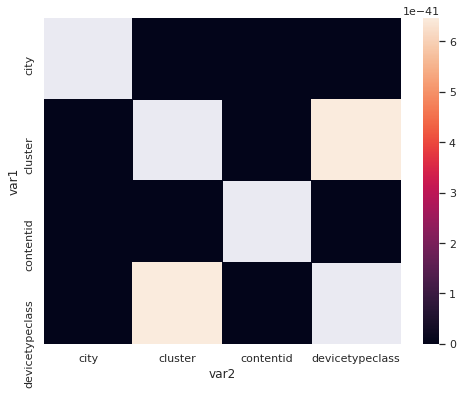

In [41]:
# plotting the results as a heatmap (p-values)
ax = sns.heatmap(for_plot)

At a significance level of 0.05, we can conclude that the association between all the selected variables is statistically significant. Thus, we can reject the null hypothesis.

### 10. Insights summary

From the data we found that a user can be exposed to 2 different campaigns with the same message (contentid) at the same exact time. The unique key identifier is compound and is shaped from the fields 'pnr', 'timestamp', 'domain' and 'mediaid'. Running several camapaigns apparently does not always guarantee high exposure. There are extreme cases where users are exposed 69 times to the sames ads in a day. Additional features like exposure duration, sales during and after campaign in case of the supermarket and number of new clients or requests in case of the financial service would serve in determining the effect from these campaigns. One can dive deeper into the geospatial features (region, city, country) to adjust the geographic targeting of clients. 